c:\Python312\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


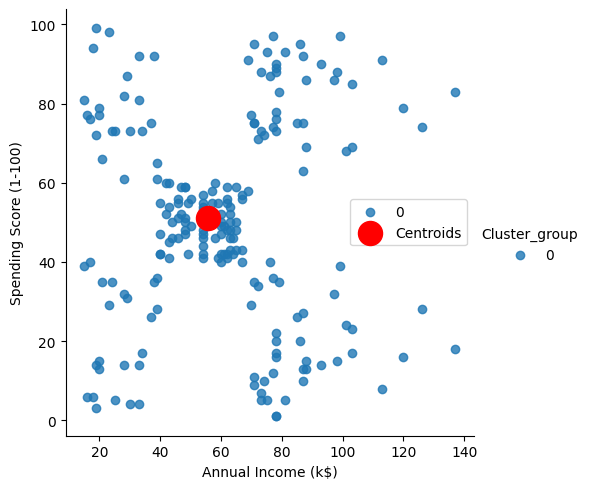

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift
import seaborn as sns

# Load the dataset
dataset = pd.read_csv('../Mall_Customers.csv')

# Extract the relevant features
X = dataset.iloc[:, 3:5].values

# Apply MeanShift
aff_prop = MeanShift()
y_aff_prop = aff_prop.fit_predict(X)

# Add cluster group to the dataset
supervised = dataset.copy()
supervised['Cluster_group'] = y_aff_prop

# Save the clustered dataset to a CSV file
supervised.to_csv("cluster_meanshift.csv", index=False)

# Get cluster centers
centroids = aff_prop.cluster_centers_

# Visualize the clusters
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], 
                   hue=supervised.columns[5], fit_reg=False, legend=True, legend_out=True)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
plt.legend()
plt.show()
